In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [16]:
with open('reacher/outputs/outcomes.pkl', 'rb') as handle:
            outputs = pickle.load(handle)

In [17]:
outputs.keys()

dict_keys(['3_min', '4_mean', '2_TD3', '1_DDPG', '6_median', '7_a2c', '8_PPO', '9_AC2', '9_PPO'])

In [12]:
'3_min'[:1]

'3'

In [18]:
outputs['7_a2c']

{'scores': [0.1099999975413084,
  0.31849999288097025,
  0.35949999196454885,
  0.518999988399446,
  0.696999984420836,
  0.6954999844543636,
  0.704999984242022,
  0.6109999863430857,
  0.4949999889358878,
  0.813499981816858,
  0.6979999843984842,
  0.7079999841749668,
  0.789999982342124,
  0.805499981995672,
  0.89849997991696,
  0.8679999805986881,
  0.8449999811127782,
  0.8514999809674919,
  0.7714999827556313,
  0.9784999781288206,
  0.9724999782629311,
  1.076999975927174,
  0.8934999800287187,
  0.9389999790117145,
  1.1004999754019082,
  0.8714999805204571,
  0.9404999789781868,
  1.0234999771229922,
  0.8174999817274511,
  0.6539999853819609,
  0.8894999801181257,
  0.8624999807216227,
  0.960499978531152,
  0.9534999786876142,
  1.0709999760612845,
  1.2644999717362224,
  0.9519999787211418,
  0.9599999785423279,
  1.1109999751672148,
  1.0654999761842192,
  0.7264999837614596,
  1.006499977502972,
  1.1789999736472965,
  1.1414999744854868,
  0.9439999788999558,
  1.03049

In [11]:
for key in outputs.keys():
    print(round(outputs[key]['scores'],2))

TypeError: type list doesn't define __round__ method

In [14]:
def plot_scores_training_all():
    """
    plot all scores 2000 episodes
    """
    with open('reacher/outputs/outcomes.pkl', 'rb') as handle:
        data = pickle.load(handle)
    labels = []
    text = f"DDPG Agent ({max(data['1_DDPG']['scores']).round(2)})"
    labels.append("DDPG Agent ")
    num_episodes = "1000"
    plt.figure(figsize=(16, 12))
    plt.subplot(111)
    plt.title(f'All Algorithm scores after solve environment score 35 average')
    plt.axhline(y=30, color='r', linestyle='dotted')
    plt.plot(np.arange(len(data['1_DDPG']['scores'])), data['1_DDPG']['scores'], label=text)
    text = f"TD3 (Twined Delayed DDPG) ({max(data['2_TD3']['scores']).round(2)})"
    labels.append("Dueling DQN no Prioritary Buffer Agent ")
    plt.plot(np.arange(len(data['2_TD3']['scores'])), data['2_TD3']['scores'], label=text)
    text = f"TD3 Agent with 4 DQN and min loss ({max(data['3_min']['scores']).round(2)})"
    labels.append("TD3 Agent with 4 DQN and min loss")
    plt.plot(np.arange(len(data['3_min']['scores'])), data['3_min']['scores'], label=text)
    text = f"TD3 Agent with 4 DQN and mean loss ({max(data['4_mean']['scores']).round(2)})"
    labels.append("TD3 Agent with 4 DQN and mean loss")
    plt.plot(np.arange(len(data['4_mean']['scores'])), data['4_mean']['scores'], label=text)
    text = f"TD3 Agent with 4 DQN and median loss ({max(data['6_median']['scores']).round(2)})"
    labels.append("TD3 Agent with 4 DQN and median loss")
    plt.plot(np.arange(len(data['6_median']['scores'])), data['6_median']['scores'], label=text)
    text = f"A2C Agent ({max(data['7_a2c']['scores']).round(2)})"
    labels.append("A2C Agent")
    plt.plot(np.arange(len(data['7_a2c']['scores'])), data['7_a2c']['scores'], label=text)
    text = f"PPO Agent ({max(data['9_PPO']['scores']).round(2)})"
    labels.append("PPO Agent")
    plt.plot(np.arange(len(data['9_PPO']['scores'])), data['9_PPO']['scores'], label=text)

    plt.ylabel('Score')
    plt.xlabel('Episode #')
    title = "Algorithm and Max Score"
    plt.legend(title=title)
    plt.savefig(f'reacher/images/scores_all_2.jpg')
    return labels

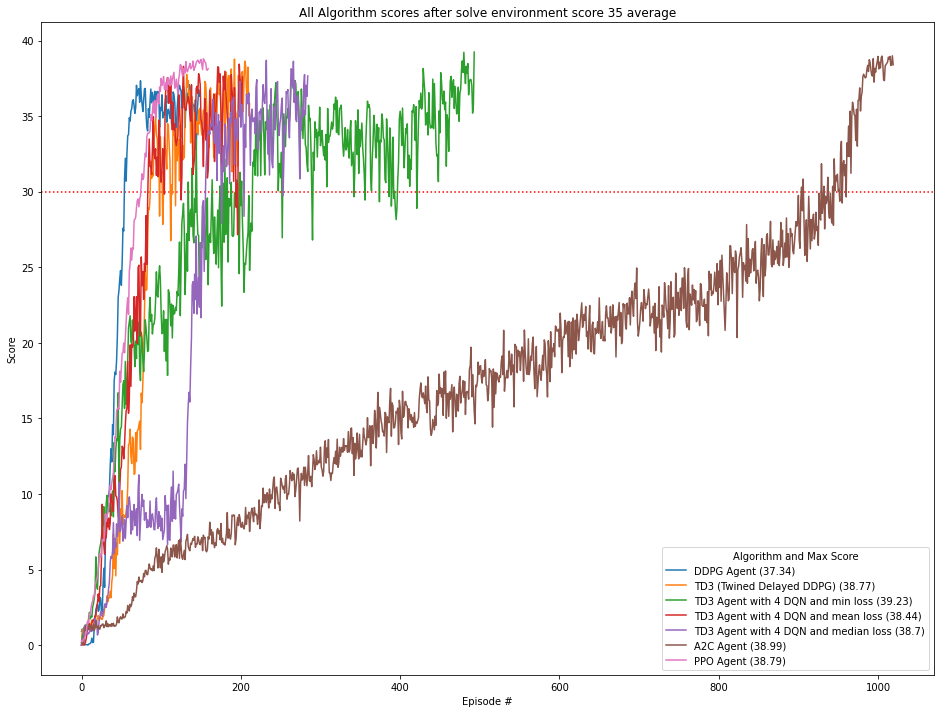

In [15]:
labels = plot_scores_training_all()

In [ ]:
def plot_time_all(labels):

    """
    plot time to win env . Collect 13 yellow bananas
    """
    with open('reacher/outputs/outcomes.pkl', 'rb') as handle:
        data = pickle.load(handle)

    num_episodes = 2000
    plt.figure(figsize=(16, 12))
    plt.subplot(111)
    plt.title(f'All Algorithm time to solve the environment. mean during at least 100 episodes of 35')

    scores = []
    types = []
    for key in data.keys():
        scores.append(data[key]['time'])
        sc = data[key]['time']
        if key == "6_median":
            key = "5_median"
        types.append(key[:1])

        plt.bar(int(key[:1]), sc, label=labels[int(key[:1]) - 1] + " " +str(round(sc,0)))
    plt.ylabel('Time')
    plt.xlabel('Algorithm #')
    title = "Algorithm and Time to solve Env"
    plt.legend(title=title)
    plt.ylim([0, 20000])
    plt.tight_layout()
    plt.savefig(f'reacher/images/time_scores_all.jpg')

    return

In [135]:
def plot_play_scores(labels):
    """

    """

    with open('reacher/outputs/outcomes.pkl', 'rb') as handle:
        data = pickle.load(handle)

    num_episodes = 2000
    plt.figure(figsize=(16, 12))
    plt.subplot(111)
    plt.title(f'All Algorithm number of episodes to solve the environment. (Mean during at least 100 episodes of 35)')
    max_episodes=0
    scores = []
    types = []
    for key in data.keys():
        scores.append(data[key]['score_play'])
        sc = len(data[key]['scores'])
        if sc> max_episodes:
            max_episodes=sc
        if key == "6_median":
            key = "5_median"
        types.append(key[:1])
        plt.bar(int(key[:1]), sc, label=labels[int(key[:1]) - 1] + " " +str(round(sc,2)))
    plt.ylabel('Score')
    plt.xlabel('Algorithm #')
    title = "Algorithm and number episodes training"
    plt.legend(title=title)
    plt.ylim([0, max_episodes+100])
    plt.tight_layout()

    plt.savefig(f'reacher/images/number_episodes_all.jpg')
    return

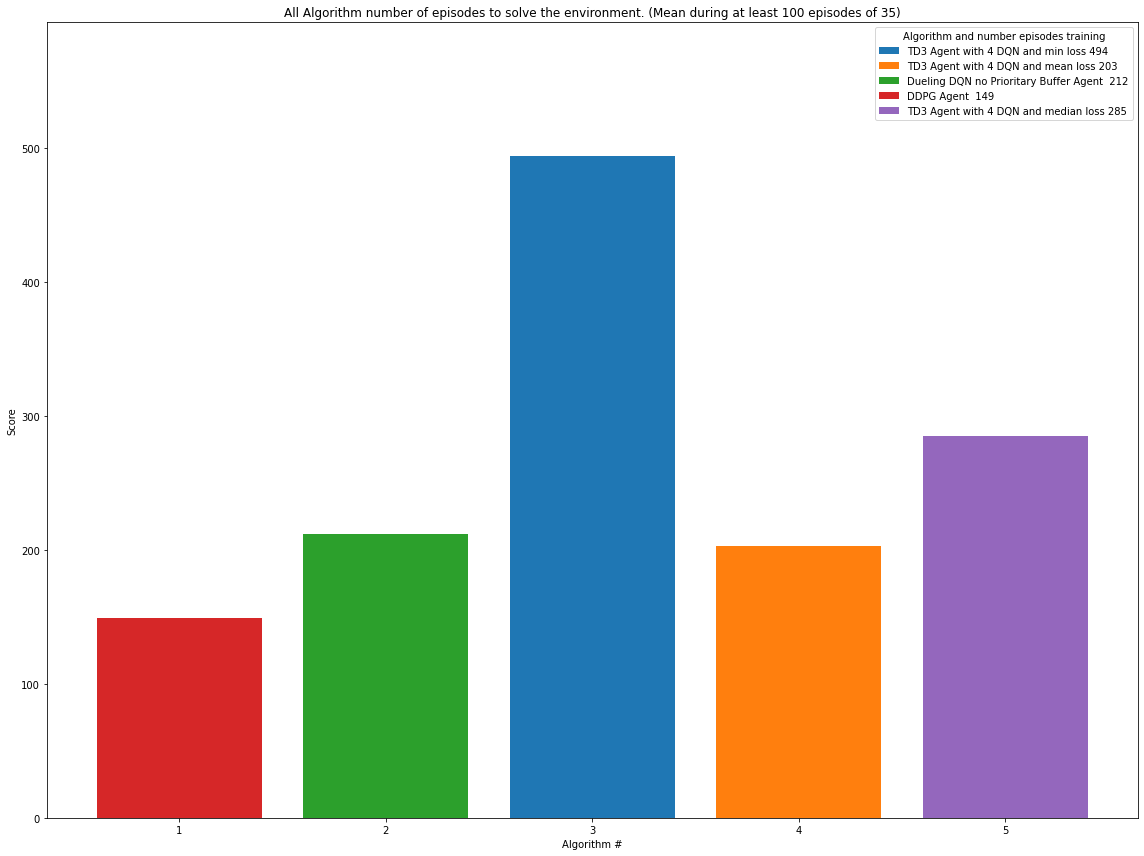

In [136]:
plot_play_scores(labels)

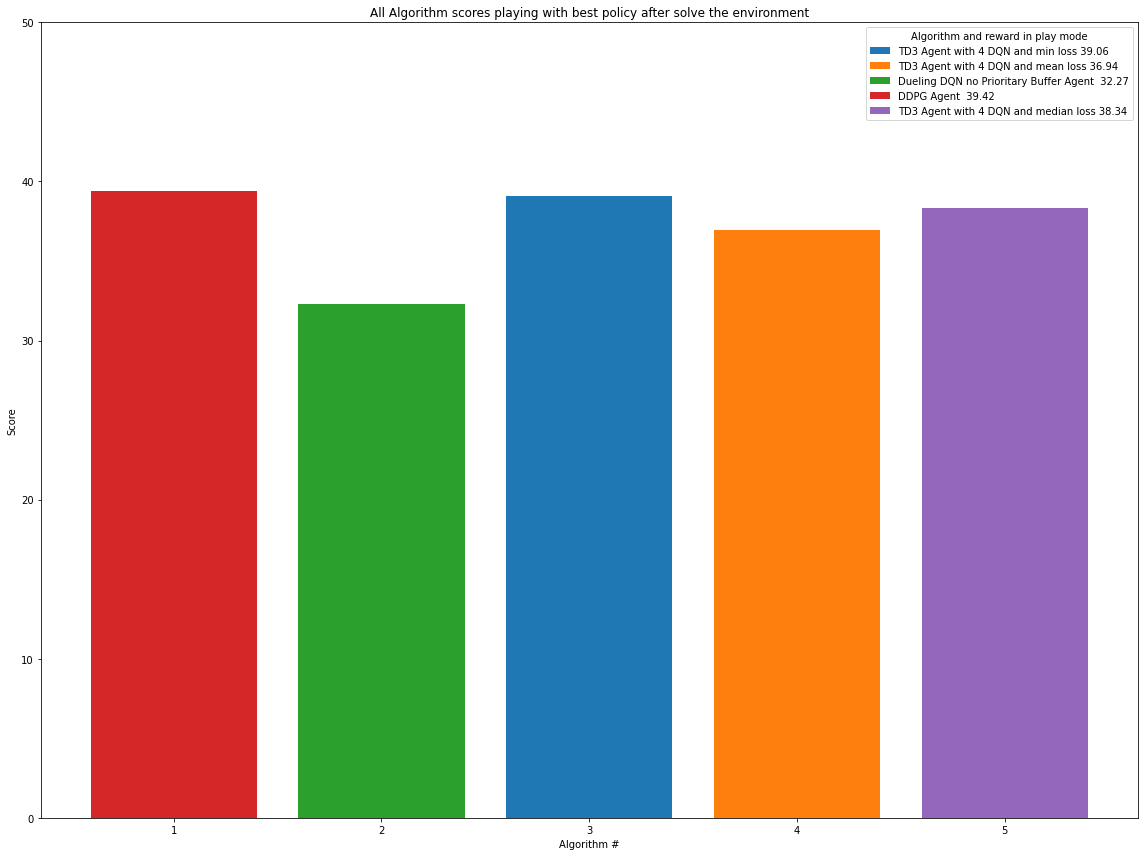

In [116]:
 plot_play_scores(labels)

In [121]:
def plot_time_all(labels):

    """
    plot time to win env . Collect 13 yellow bananas
    """
    with open('reacher/outputs/outcomes.pkl', 'rb') as handle:
        data = pickle.load(handle)

    num_episodes = 2000
    plt.figure(figsize=(16, 12))
    plt.subplot(111)
    plt.title(f'All Algorithm time to solve the environment. mean during at least 100 episodes of 35')

    scores = []
    types = []
    for key in data.keys():
        scores.append(data[key]['time'])
        sc = data[key]['time']
        if key == "6_median":
            key = "5_median"
        types.append(key[:1])

        plt.bar(int(key[:1]), sc, label=labels[int(key[:1]) - 1] + " " +str(round(sc,0)))
    plt.ylabel('Time')
    plt.xlabel('Algorithm #')
    title = "Algorithm and Time to solve Env"
    plt.legend(title=title)
    plt.ylim([0, 20000])
    plt.tight_layout()
    plt.savefig(f'reacher/images/time_scores_all.jpg')

    return

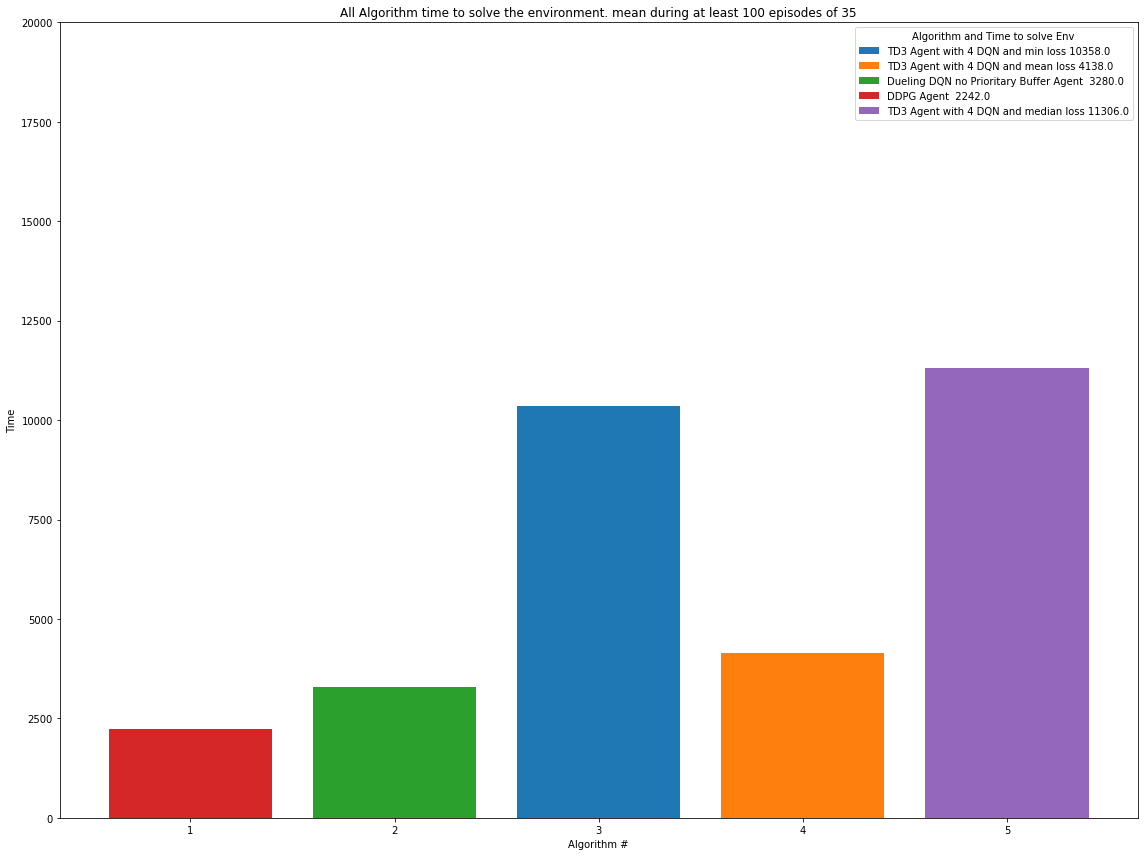

In [122]:
plot_time_all(labels)

In [24]:
import torch
import numpy as np

In [68]:
a = torch.randn(128, 1)
b = torch.randn(128, 1)
c = torch.randn(128, 1)

In [69]:
a, b, c

(tensor([[-0.9132],
         [ 0.5103],
         [-2.5326],
         [ 1.3475],
         [ 1.3368],
         [-0.0126],
         [ 2.1903],
         [-0.2053],
         [-0.0321],
         [ 0.4279],
         [ 0.3620],
         [ 0.5638],
         [-0.5447],
         [-1.5330],
         [-0.3055],
         [ 1.0502],
         [-1.7165],
         [ 1.2953],
         [ 1.4050],
         [-0.4697],
         [ 0.5891],
         [ 0.4777],
         [ 0.2407],
         [-0.4669],
         [ 0.6953],
         [-0.9129],
         [ 0.4103],
         [-0.3616],
         [-2.0728],
         [ 1.3092],
         [-0.1441],
         [ 0.7538],
         [-0.7191],
         [-0.2833],
         [-1.7500],
         [-0.4306],
         [-0.2748],
         [ 0.3874],
         [ 1.1975],
         [-0.6210],
         [ 0.5522],
         [-1.3516],
         [-0.4838],
         [ 0.3695],
         [-1.0175],
         [ 0.7786],
         [-0.1347],
         [ 0.1625],
         [ 1.4102],
         [-1.2243],


In [70]:
len(a)

128

In [71]:
a[0],b[0],c[0]

(tensor([-0.9132]), tensor([1.8012]), tensor([-1.5611]))

In [73]:
vector=[]
for i in range(0, len(a)):
    d=torch.stack((a[i],b[i], c[i]))
    
    vector.append(torch.median(d,dim=0).values)
    
    
    
next_values

torch.return_types.median(
values=tensor([-0.9132]),
indices=tensor([0]))

In [82]:
torch.from_numpy(np.array(vector)).resize(len(vector),1)

tensor([[-0.9132],
        [ 0.5103],
        [-1.1578],
        [ 0.5949],
        [-1.3535],
        [-1.2622],
        [-0.1268],
        [-0.2053],
        [ 0.1803],
        [ 0.4279],
        [ 0.3620],
        [ 0.5638],
        [ 1.2528],
        [-0.2769],
        [-0.3055],
        [-0.2331],
        [-0.9694],
        [ 0.6487],
        [ 0.1082],
        [-0.3200],
        [ 0.5891],
        [ 0.1874],
        [ 1.0738],
        [-0.8375],
        [-0.2531],
        [-0.9129],
        [-0.8194],
        [ 0.2894],
        [-1.9412],
        [-0.3928],
        [-0.1441],
        [ 0.7538],
        [-0.7191],
        [-0.6970],
        [-0.3548],
        [-0.2081],
        [-0.0213],
        [ 0.3874],
        [ 0.5957],
        [-0.6210],
        [-0.3026],
        [-0.8281],
        [-0.4838],
        [ 0.6008],
        [ 0.6278],
        [-0.4281],
        [ 0.0339],
        [ 0.1625],
        [ 1.3199],
        [-1.4643],
        [ 0.3944],
        [-0.4775],
        [-1.